<a href="https://colab.research.google.com/github/Acelhaka/AIFinalProject/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer DataSet
**Predicting if the cancer cells are benign = 0 or malignant = 1**

Attribute Information:

1) ID number 
2) Diagnosis (1 = malignant , 0 = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. 
For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

https://www.google.com/url?sa=i&source=images&cd=&ved=2ahUKEwiL1snOzfnhAhURT6wKHSn6D2gQjRx6BAgBEAU&url=https%3A%2F%2Fhpathy.com%2Fcause-symptoms-treatment%2Ftumors-cancer%2F&psig=AOvVaw3EZoGKiUzCKZY6rLacF6JF&ust=1556774925229715



---Importing the open source AI library (TensorFlow)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns # data visualization library 
import numpy as np
import matplotlib.pyplot as plt

---Importing the file with the data

In [0]:
from google.colab import files
uploaded = files.upload()

Saving breastCancerData.csv to breastCancerData.csv


---Skipping the first row that contains the header of each column

---To suspress scientific notations used: np.set_printoptions(suppress=True)

In [0]:
np.set_printoptions(suppress=True) #to suspress scientific notations
xy = np.loadtxt('breastCancerData.csv', skiprows = 1, delimiter = ",")

In [0]:
print(xy.shape)


(569, 32)


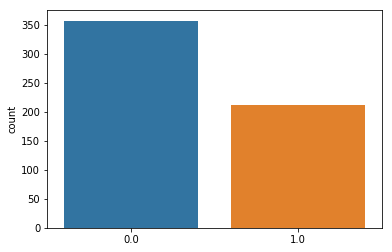

In [0]:
import plotly.graph_objs as go
output = xy[:, 1]

ax = sns.countplot(output, label="Count")     

#Blue = Benign = 357
#Yellow = Malignant = 212


---printing 5 rows to check the dataset

1- First column is the ID 
2 - Second column is the dependent varaible (Y)



In [0]:
print(xy[0:5, :])

[[  842302.              1.             17.99           10.38
       122.8          1001.              0.1184          0.2776
         0.3001          0.1471          0.2419          0.07871
         1.095           0.9053          8.589         153.4
         0.006399        0.04904         0.05373         0.01587
         0.03003         0.006193       25.38           17.33
       184.6          2019.              0.1622          0.6656
         0.7119          0.2654          0.4601          0.1189  ]
 [  842517.              1.             20.57           17.77
       132.9          1326.              0.08474         0.07864
         0.0869          0.07017         0.1812          0.05667
         0.5435          0.7339          3.398          74.08
         0.005225        0.01308         0.0186          0.0134
         0.01389         0.003532       24.99           23.41
       158.8          1956.              0.1238          0.1866
         0.2416          0.186           0.275

## Create a boxplot
To check for each feature the outliers and the mean.

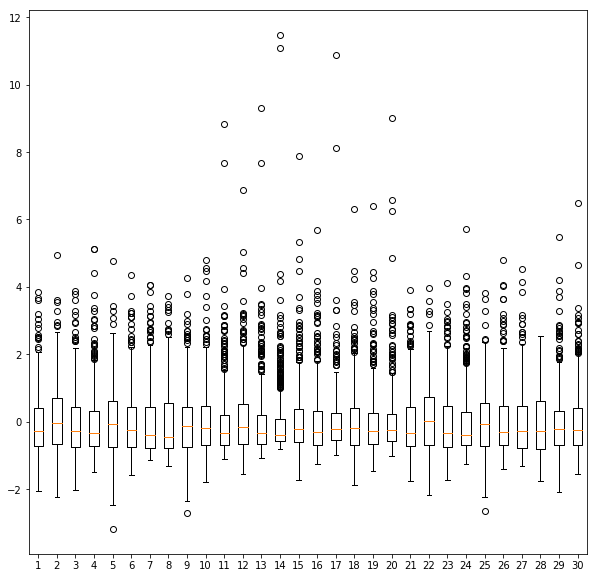

In [0]:
# Create a figure instance
fig = plt.figure(1, figsize=(10, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(xy[:, 2:32])

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

## ---**Splitingt the data into Training data and Test data

Before splitting the data into training data set and testing data set, checked if it is necessary to shuffle the dataset(rows). Rows seem to already be a good mixture of 1 = Malignant and 0 = Belign (output column), not necessary to shuffle.

In [0]:
#spliting the data into 400 first rows for the train data set
#the last 169 rows are split into the test data set
xy_train = xy[0:400, :]
xy_test  = xy[400:, :]

Printing train and test data set dimensions

In [0]:
print(xy_train.shape)
print(xy_test.shape)

(400, 32)
(169, 32)


## **Checking the correlation of each input feature with the output**

Checking the correlation of the first feature (radius_mean[col2]) with diagnosis [col1]

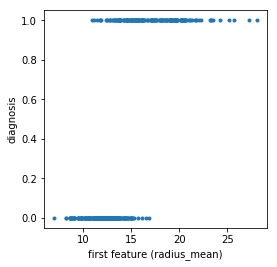

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 2], xy_train[:, 1], '.')
plt.xlabel('first feature (radius_mean)')
plt.ylabel('diagnosis')
plt.show()

Analysis: Bigger radius of the cells correlates to higher chances of a Malignant cancer

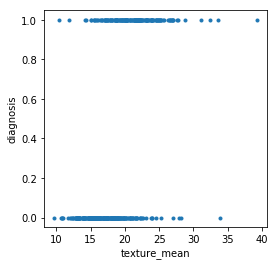

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 3], xy_train[:, 1], '.')
plt.xlabel('texture_mean')
plt.ylabel('diagnosis')
plt.show()

Analysis: Texture_mean is correlated with diagnosis, M or B but not with the same correlation as radius mean

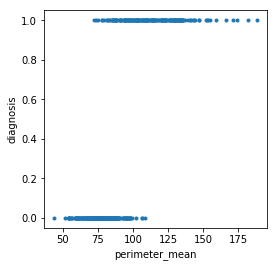

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 4], xy_train[:, 1], '.')
plt.xlabel('perimeter_mean')
plt.ylabel('diagnosis')
plt.show()

Analysis: higher values of perimeter mean higher chances of the cell to be Malignant, however between a perimeter mean of 75-100 we cannot easily determine what type of cell is.

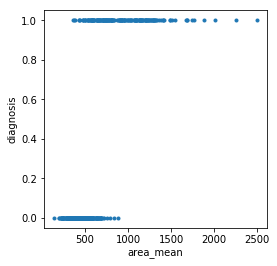

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 5], xy_train[:, 1], '.')
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
plt.show()

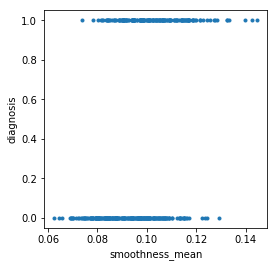

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 6], xy_train[:, 1], '.')
plt.xlabel('smoothness_mean')
plt.ylabel('diagnosis')
plt.show()

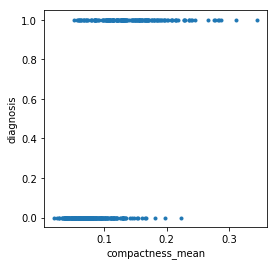

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 7], xy_train[:, 1], '.')
plt.xlabel('compactness_mean')
plt.ylabel('diagnosis')
plt.show()

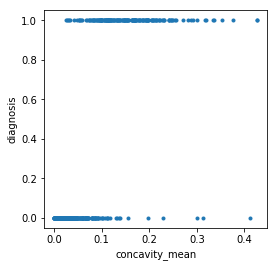

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 8], xy_train[:, 1], '.')
plt.xlabel('concavity_mean')
plt.ylabel('diagnosis')
plt.show()

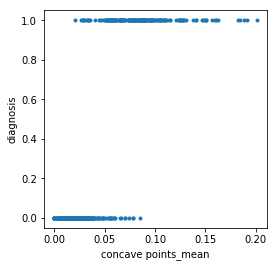

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 9], xy_train[:, 1], '.')
plt.xlabel('concave points_mean')
plt.ylabel('diagnosis')
plt.show()

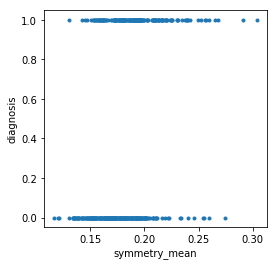

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 10], xy_train[:, 1], '.')
plt.xlabel('symmetry_mean')
plt.ylabel('diagnosis')
plt.show()

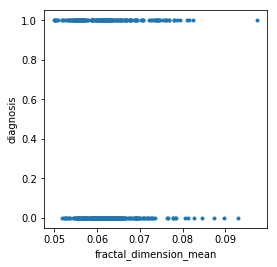

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 11], xy_train[:, 1], '.')
plt.xlabel('fractal_dimension_mean')
plt.ylabel('diagnosis')
plt.show()

Explanation: Fractal dimension is a measure of how "complicated" a self-similar figure is. In a rough sense, it measures "how many points" lie in a given set. 
https://www.youtube.com/watch?v=gB9n2gHsHN4

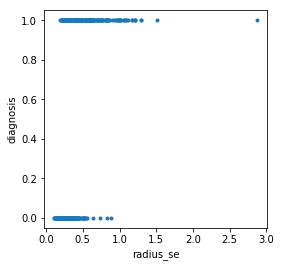

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 12], xy_train[:, 1], '.')
plt.xlabel('radius_se')
plt.ylabel('diagnosis')
plt.show()

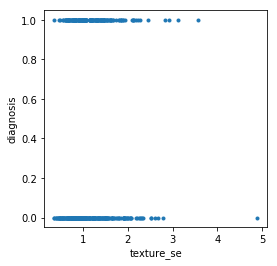

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 13], xy_train[:, 1], '.')
plt.xlabel('texture_se')
plt.ylabel('diagnosis')
plt.show()

Analysis: Texture standard error feature, does not help in our predictions, since if it varies from 0-3 it can be both a Malign ant or Benign cell.

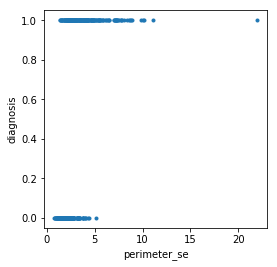

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 14], xy_train[:, 1], '.')
plt.xlabel('perimeter_se')
plt.ylabel('diagnosis')
plt.show()

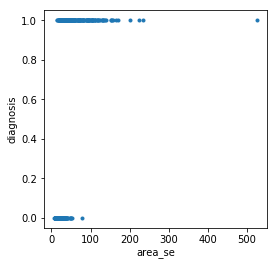

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 15], xy_train[:, 1], '.')
plt.xlabel('area_se')
plt.ylabel('diagnosis')
plt.show()

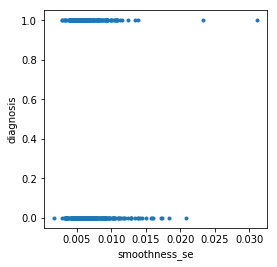

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 16], xy_train[:, 1], '.')
plt.xlabel('smoothness_se')
plt.ylabel('diagnosis')
plt.show()

Analysis: Same conclusion as texture_se we can attain for smoothness_se, it will not have an impactfull weight on our prediction

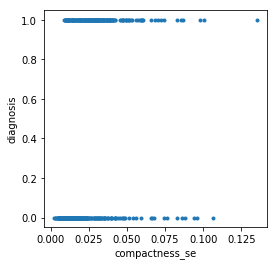

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 17], xy_train[:, 1], '.')
plt.xlabel('compactness_se')
plt.ylabel('diagnosis')
plt.show()

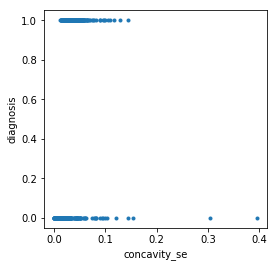

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 18], xy_train[:, 1], '.')
plt.xlabel('concavity_se')
plt.ylabel('diagnosis')
plt.show()

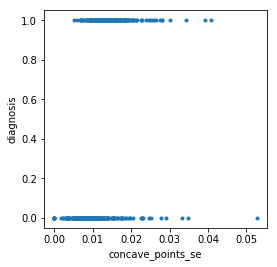

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 19], xy_train[:, 1], '.')
plt.xlabel('concave_points_se')
plt.ylabel('diagnosis')
plt.show()

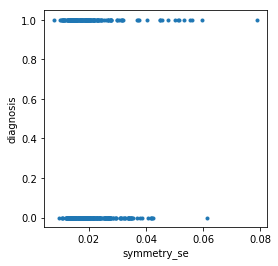

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 20], xy_train[:, 1], '.')
plt.xlabel('symmetry_se')
plt.ylabel('diagnosis')
plt.show()

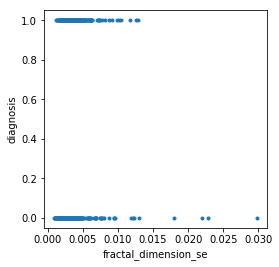

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 21], xy_train[:, 1], '.')
plt.xlabel('fractal_dimension_se')
plt.ylabel('diagnosis')
plt.show()

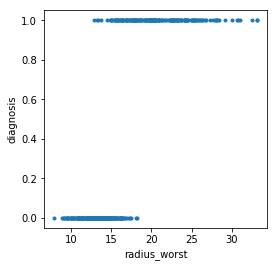

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 22], xy_train[:, 1], '.')
plt.xlabel('radius_worst')
plt.ylabel('diagnosis')
plt.show()

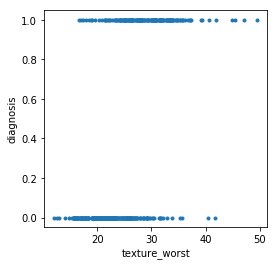

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 23], xy_train[:, 1], '.')
plt.xlabel('texture_worst')
plt.ylabel('diagnosis')
plt.show()

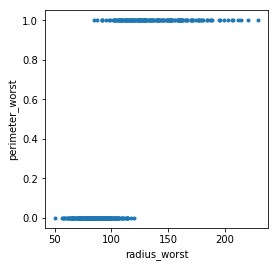

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 24], xy_train[:, 1], '.')
plt.xlabel('radius_worst')
plt.ylabel('perimeter_worst')
plt.show()

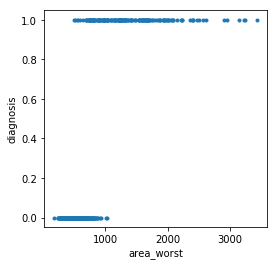

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 25], xy_train[:, 1], '.')
plt.xlabel('area_worst')
plt.ylabel('diagnosis')
plt.show()

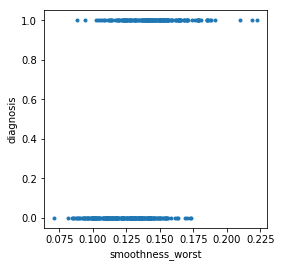

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 26], xy_train[:, 1], '.')
plt.xlabel('smoothness_worst')
plt.ylabel('diagnosis')
plt.show()

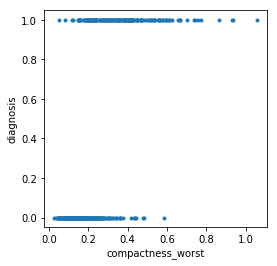

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 27], xy_train[:, 1], '.')
plt.xlabel('compactness_worst')
plt.ylabel('diagnosis')
plt.show()

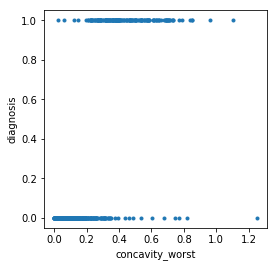

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 28], xy_train[:, 1], '.')
plt.xlabel('concavity_worst')
plt.ylabel('diagnosis')
plt.show()

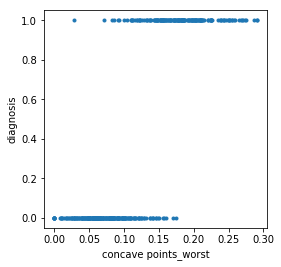

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 29], xy_train[:, 1], '.')
plt.xlabel('concave points_worst')
plt.ylabel('diagnosis')
plt.show()

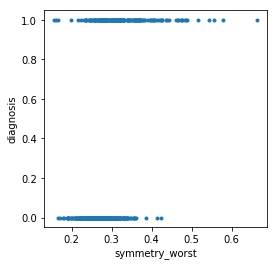

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 30], xy_train[:, 1], '.')
plt.xlabel('symmetry_worst')
plt.ylabel('diagnosis')
plt.show()

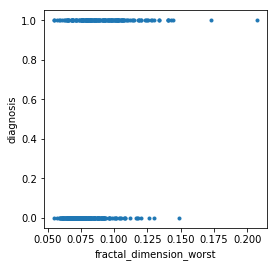

In [0]:
plt.figure(figsize=(4,4))
plt.plot(xy_train[:, 31], xy_train[:, 1], '.')
plt.xlabel('fractal_dimension_worst')
plt.ylabel('diagnosis')
plt.show()

## Splitting the set into corresponding X(inputs) and Y(outputs)**

In [0]:
#2-31 columns from the xy_train set
x_train = xy_train[:, 2:32]
print(x_train[0:5, :])

#output feature to train
y_train = xy_train[:, 1]



#x_test contains columns from 2-31 of the 400+ rows
x_test = xy_test[:, 2:32]
y_test = xy_test[:, 1 ]

[[ 1.02657917 -2.08243377  1.19736196  0.91859792  1.54355776  3.11361256
   2.50997064  2.38617079  2.06553223  2.2064119   2.43056639 -0.54086013
   2.75462401  2.55067808 -0.19942657  1.18994085  0.62003956  0.58837688
   0.9795074   0.80432755  1.77143584 -1.30808125  2.18783674  1.8916452
   1.23960047  2.42838506  2.00854658  2.15688186  2.44600065  1.81229287]
 [ 1.74850201 -0.28733171  1.60760452  1.82939937 -0.87675904 -0.51405654
  -0.08830407  0.45880849 -0.07036679 -0.84681266  0.44166134 -0.85963674
   0.21046733  0.72995108 -0.58243417 -0.68650166 -0.43335926  0.20506391
  -0.8039003  -0.11798902  1.69276957 -0.31334577  1.43687377  1.7834848
  -0.40159072 -0.45698046 -0.19608489  0.98475209 -0.31937386  0.23870437]
 [ 1.50226476  0.55799375  1.4898121   1.48469605  0.9107952   0.96756987
   1.2583627   1.90514445  0.83395948 -0.38688954  1.17050578 -0.76106521
   0.79222691  1.18788733 -0.28066072  0.72135204  0.1579594   1.31930972
   0.14747146  0.24213384  1.40634366 

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 30)
(169, 30)
(400,)
(169,)


## **Data normalization**
Decided to normalize the data, because after building the model without normalizing the data, mae was equal with nan, increasing the batch size did not solve the problem.
Normalizing will create a more robust data and the values with large magnitudes will not overwhelm small values.

Normalization used:
y = (x - mean) / standard_deviation
where 
standard_deviation = sqrt( sum( (x - mean)^2 ) / count(x))

The mean and standard deviation estimates of a dataset can be more robust to new data than the minimum and maximum.

In [0]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

# **Build the model**

In [0]:

# import regularizer
from keras.regularizers import l1
# instantiate regularizer
reg = l1(0.001)

model = Sequential() #linear stack of layers
model.add(Dense(1, input_dim = 30,  activation='linear', activity_regularizer=l1(0.001)))
print(model.summary())

#31 parameters-- 1 for the noise data
#all parameters(input features) are being trained

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


Optimizer used: Stochastic gradient descent(SGD) , works well for shallow networks

In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Statistics:

epoch = 130 and batch_size = 128
=> accuracy = 0.9375

In [0]:
# Verbose = 0 shows no updates, can be changed to 1 or 2
history = model.fit(x_train, y_train, epochs= 130, verbose = 2, batch_size = 128 , validation_data = (x_test, y_test))

Train on 400 samples, validate on 169 samples
Epoch 1/130
 - 0s - loss: 4.5522 - acc: 0.3775 - val_loss: 2.2878 - val_acc: 0.4497
Epoch 2/130
 - 0s - loss: 2.7272 - acc: 0.4250 - val_loss: 1.3680 - val_acc: 0.3964
Epoch 3/130
 - 0s - loss: 1.6936 - acc: 0.3825 - val_loss: 1.2061 - val_acc: 0.3728
Epoch 4/130
 - 0s - loss: 1.2840 - acc: 0.3650 - val_loss: 0.9050 - val_acc: 0.3669
Epoch 5/130
 - 0s - loss: 1.2501 - acc: 0.3400 - val_loss: 0.8535 - val_acc: 0.3609
Epoch 6/130
 - 0s - loss: 0.9772 - acc: 0.3275 - val_loss: 0.6578 - val_acc: 0.3077
Epoch 7/130
 - 0s - loss: 0.7584 - acc: 0.2700 - val_loss: 0.5226 - val_acc: 0.2840
Epoch 8/130
 - 0s - loss: 0.7327 - acc: 0.2475 - val_loss: 0.5226 - val_acc: 0.2840
Epoch 9/130
 - 0s - loss: 0.7289 - acc: 0.2525 - val_loss: 0.5195 - val_acc: 0.2899
Epoch 10/130
 - 0s - loss: 0.6917 - acc: 0.2625 - val_loss: 0.4450 - val_acc: 0.3136
Epoch 11/130
 - 0s - loss: 0.6393 - acc: 0.2825 - val_loss: 0.4375 - val_acc: 0.3136
Epoch 12/130
 - 0s - loss: 0

### My statistics: 

Increasing epochs size to 250, batch size to its default value = 32
=> Accuracy = 0.9725.

Thoughts: Noticed that increasing the batch size, accuracy also was increased to almost 0.04.

acc is the accuracy of a batch of training data and val_acc is the accuracy of a batch of testing data

In [0]:
# Verbose = 2 to check the accuracy and val of accuracy in order to see if overfitting happens 
history = model.fit(x_train, y_train, epochs= 250, verbose = 2, batch_size = 32 , validation_data = (x_test, y_test))

Train on 400 samples, validate on 169 samples
Epoch 1/250
 - 0s - loss: 0.0782 - acc: 0.9325 - val_loss: 0.0780 - val_acc: 0.9112
Epoch 2/250
 - 0s - loss: 0.0776 - acc: 0.9425 - val_loss: 0.0777 - val_acc: 0.9112
Epoch 3/250
 - 0s - loss: 0.0770 - acc: 0.9400 - val_loss: 0.0775 - val_acc: 0.9112
Epoch 4/250
 - 0s - loss: 0.0770 - acc: 0.9400 - val_loss: 0.0792 - val_acc: 0.9053
Epoch 5/250
 - 0s - loss: 0.0763 - acc: 0.9425 - val_loss: 0.0776 - val_acc: 0.9112
Epoch 6/250
 - 0s - loss: 0.0764 - acc: 0.9425 - val_loss: 0.0767 - val_acc: 0.9172
Epoch 7/250
 - 0s - loss: 0.0758 - acc: 0.9400 - val_loss: 0.0778 - val_acc: 0.9231
Epoch 8/250
 - 0s - loss: 0.0752 - acc: 0.9425 - val_loss: 0.0754 - val_acc: 0.9112
Epoch 9/250
 - 0s - loss: 0.0755 - acc: 0.9375 - val_loss: 0.0767 - val_acc: 0.9112
Epoch 10/250
 - 0s - loss: 0.0744 - acc: 0.9400 - val_loss: 0.0778 - val_acc: 0.9112
Epoch 11/250
 - 0s - loss: 0.0737 - acc: 0.9475 - val_loss: 0.0733 - val_acc: 0.9172
Epoch 12/250
 - 0s - loss: 0

# **Evaluating Predictions**

In [0]:
print(y_test[0:6])

[1. 0. 0. 0. 0. 0.]



Predicted Values seemed to be quite close to the real values.

In [0]:
prediction = model.predict(x_test)
print(prediction[0:6])

[[0.9478638 ]
 [0.04889843]
 [0.01512089]
 [0.10708416]
 [0.0308044 ]
 [0.20524046]]


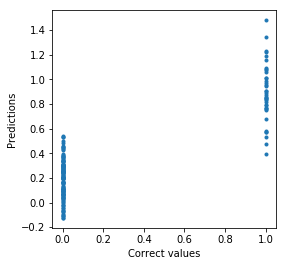

In [0]:
plt.figure(figsize=(4,4))
plt.plot(y_test, prediction, '.')
plt.xlabel('Correct values')
plt.ylabel('Predictions')
plt.show()

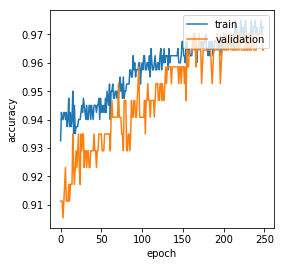

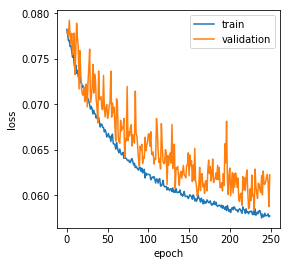

In [0]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Changing the activation of the network to sigmoid, logistic regression, using the same number of epochs as the previous network 256.
The loss function, binary_crossentropy, is specific to binary classification.

In [0]:
model = Sequential()
#model.add(Dense(16, input_dim = 30, activation='sigmoid'))
model.add(Dense(1, input_dim = 30, activation='sigmoid'))
#model.add(Dense(1, activation='linear'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 256, verbose = 2, batch_size=32, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 169 samples
Epoch 1/256
 - 0s - loss: 0.6264 - acc: 0.6825 - val_loss: 0.5273 - val_acc: 0.7515
Epoch 2/256
 - 0s - loss: 0.5065 - acc: 0.7900 - val_loss: 0.4373 - val_acc: 0.8284
Epoch 3/256
 - 0s - loss: 0.4319 - acc: 0.8400 - val_loss: 0.3804 - val_acc: 0.8935
Epoch 4/256
 - 0s - loss: 0.3822 - acc: 0.8650 - val_loss: 0.3414 - val_acc: 0.9290
Epoch 5/256
 - 0s - loss: 0.3468 - acc: 0.8750 - val_loss: 0.3129 - val_acc: 0.9408
Epoch 6/256
 - 0s - loss: 0.3201 - acc: 0.8875 - val_loss: 0.2909 - val_acc: 0.9586
Epoch 7/256
 - 0s - loss: 0.2992 - acc: 0.9000 - val_loss: 0.2734 - val_acc: 0.9586
Epoch 8/256
 - 0s - loss: 0.2822 - 

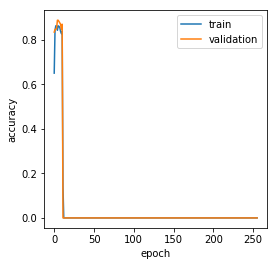

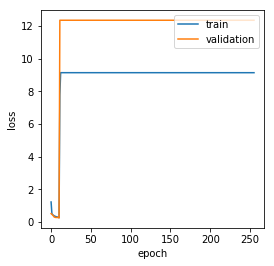

In [0]:
plt.figure(figsize=(4,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

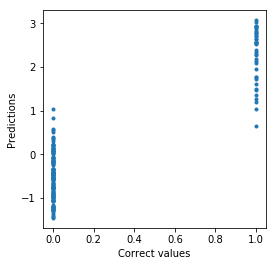

In [0]:
prediction = model.predict(x_test)
plt.figure(figsize=(4,4))
plt.plot(y_test, prediction, '.')
plt.xlabel('Correct values')
plt.ylabel('Predictions')
plt.show()

In [0]:
np.set_printoptions(precision = 3)
print ('True Validation Data:')
print(y_test[0:6])
print ('Prediction:')
prediction = model.predict(x_test)
print(prediction[0:6])

True Validation Data:
[1. 0. 0. 0. 0. 0.]
Prediction:
[[ 2.707]
 [-0.904]
 [-1.001]
 [-0.776]
 [-1.171]
 [-0.882]]


# Using a larger network

In [0]:

# example of l1 norm on activity from a dense layer

from keras.regularizers import l1
from keras.layers import Dropout

model = Sequential()
model.add(Dense(30, input_dim = 30, activation='linear'))
model.add(Dropout(0.2)) 
model.add(Dense(16, input_dim = 30, activation='linear'))
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 256, verbose = 2, batch_size=32, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 17        
Total params: 1,443
Trainable params: 1,443
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 169 samples
Epoch 1/256
 - 1s - loss: 0.7578 - acc: 0.6575 - val_loss: 0.3813 - val_acc: 0.8639
Epoch

In [0]:
from keras.regularizers import l1
from keras.layers import Dropout

model = Sequential()
model.add(Dense(30, input_dim = 30, activation='linear'))
#model.add(Dropout(0.2)) 
model.add(Dense(16, input_dim = 30, activation='linear'))
#model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 256, verbose = 2, batch_size=32, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_41 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 17        
Total params: 1,443
Trainable params: 1,443
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 169 samples
Epoch 1/256
 - 1s - loss: 0.3766 - acc: 0.8975 - val_loss: 0.2424 - val_acc: 0.9822
Epoch 2/256
 - 0s - loss: 0.2321 - acc: 0.9400 - val_loss: 0.1795 - val_acc: 0.9763
Epoch 3/256
 - 0s - loss: 0.1920 - acc: 0.9500 - val_loss: 0.1535 - val_acc: 0.9763
Epoch 4/256
 - 0s - loss: 0.1713 - acc: 0.9525 - val_loss: 0.1373 - val_acc: 0.9763
Epoch 5/256
 - 0s

In [0]:
from keras.regularizers import l1
from keras.layers import Dropout

model = Sequential()
model.add(Dense(30, input_dim = 30, activation='linear'))
model.add(Dropout(0.2)) 
model.add(Dense(16, input_dim = 30, activation='linear'))
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs= 500, verbose = 2, batch_size=64, validation_data = (x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 17        
Total params: 1,443
Trainable params: 1,443
Non-trainable params: 0
_________________________________________________________________
None
Train on 400 samples, validate on 169 samples
Epoch 1/500
 - 1s - loss: 0.4573 - acc: 0.7975 - val_loss: 0.2897 - val_acc: 0.9408
Epoch

In [0]:
np.set_printoptions(precision = 3)
print ('True Validation Data:')
print(y_test[0:6])
print ('Prediction:')
prediction = model.predict(x_test)
print(prediction[0:6])

True Validation Data:
[1. 0. 0. 0. 0. 0.]
Prediction:
[[1.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.   ]
 [0.001]]


In [0]:
!git init

Initialized empty Git repository in /content/.git/


In [0]:
!git config — global user.email “amarildacelhaka@gmail.com”
!git config — global user.name “acelhaka”

git: 'config — global' is not a git command. See 'git --help'.
git: 'config — global' is not a git command. See 'git --help'.


In [0]:
#add all files
!git add -A

In [0]:
#first commit
!git commit -m “first commit”

error: pathspec 'commit”' did not match any file(s) known to git.


In [0]:
!git remote add origin https://github.com/Acelhaka/ArtificalIntelligence.git

fatal: remote origin already exists.


In [0]:
!git push -u origin master

error: src refspec master does not match any.
error: failed to push some refs to 'https://github.com/Acelhaka/ArtificalIntelligence.git'


In [0]:
from keras.regularizers import l1
from keras.layers import Dropout

model = Sequential()
model.add(Dense(1, input_dim = 30, activation='sigmoid'))

print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history = model.fit(x_train, y_train, epochs= 500, verbose = 2, batch_size=64, validation_data = (x_test, y_test))

Train on 400 samples, validate on 169 samples
Epoch 1/500
 - 0s - loss: 1.0694 - acc: 0.2975 - val_loss: 0.8176 - val_acc: 0.4497
Epoch 2/500
 - 0s - loss: 0.8424 - acc: 0.4425 - val_loss: 0.6834 - val_acc: 0.6331
Epoch 3/500
 - 0s - loss: 0.6916 - acc: 0.5800 - val_loss: 0.5858 - val_acc: 0.7101
Epoch 4/500
 - 0s - loss: 0.5838 - acc: 0.7025 - val_loss: 0.5182 - val_acc: 0.7929
Epoch 5/500
 - 0s - loss: 0.5098 - acc: 0.7875 - val_loss: 0.4672 - val_acc: 0.8107
Epoch 6/500
 - 0s - loss: 0.4541 - acc: 0.8200 - val_loss: 0.4273 - val_acc: 0.8521
Epoch 7/500
 - 0s - loss: 0.4103 - acc: 0.8550 - val_loss: 0.3958 - val_acc: 0.8757
Epoch 8/500
 - 0s - loss: 0.3761 - acc: 0.8700 - val_loss: 0.3708 - val_acc: 0.8817
Epoch 9/500
 - 0s - loss: 0.3490 - acc: 0.8800 - val_loss: 0.3507 - val_acc: 0.8817
Epoch 10/500
 - 0s - loss: 0.3281 - acc: 0.8900 - val_loss: 0.3331 - val_acc: 0.8876
Epoch 11/500
 - 0s - loss: 0.3097 - acc: 0.9000 - val_loss: 0.3180 - val_acc: 0.8935
Epoch 12/500
 - 0s - loss: 0

In [0]:
len(x_train[0])

30

In [0]:
print('Model weights (w0, w1, and bias):')
print(range(x_train[0])
for i in range(len(x_train[0]))
  w[i] = model.layers[0].get_weights()[0][i]
#w1 = model.layers[0].get_weights()[0][1]
#w2 = model.layers[0].get_weights()[0][1]
b0 = model.layers[0].get_weights()[1]
print(w[0])
print(w[1])
print(b0)

SyntaxError: ignored